In [1]:
# Enabling print for all lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Checking the working directory
import os
os.getcwd()

'C:\\Users\\Administrator\\Python_work\\Edureka'

In [2]:
# Importing the necessary libraries
import random

from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D

from keras.utils import np_utils
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

**`MNIST data`**

[MNIST](http://yann.lecun.com/exdb/mnist/)(Modified National Institute of Standards and Technology) is a well-known dataset used in Computer Vision that was built by Yann Le Cun et. al. It is composed of images that are handwritten digits (0-9), split into a training set of 50,000 images and a test set of 10,000 where each image is of 28 x 28 pixels in width and height.

In [3]:
# Loading the in-built dataset from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(28, 28)


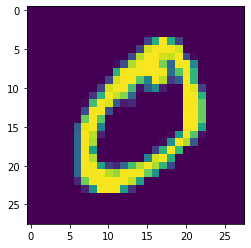

In [4]:
# PLotting any random train image from the above data set
import matplotlib.pyplot as plt

image = X_train[1]
print(image.shape)
plt.imshow(image)
plt.show()

(10, 28, 28)


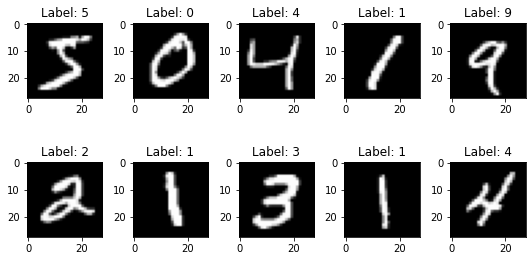

In [5]:
# Generating 10 random images from MNIST
num = 10
images = X_train[:num]
labels = y_train[:num]

print(images.shape)
num_row = 2
num_col = 5


# Plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
#     ax.imshow(images[i], cmap='gray')
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show();

In [6]:
# Let's print the shape of the dataset
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train shape (60000, 784)
X_test shape (10000, 784)


In [8]:
# Normalizing the data to help with the training
X_train /= 255
X_test /= 255

type(X_train), type(X_test)

(numpy.ndarray, numpy.ndarray)

In [9]:
# One-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


Lets build a basic Fully Connected Neural Network(FCN) for the dataset before we train the CNN. The basic steps to build an image classification model using a neural network are

1. Flatten the input image dimensions to 1D (width pixels x height pixels)
2. Normalize the image pixel values (divide by 255)
3. One-Hot Encode the categorical column
4. Build a model architecture (Sequential) with Dense layers
5. Train the model and make predictions

In [10]:
# Building a linear stack of layers with the sequential model

# Sequential model
model = Sequential()

# Hidden layer
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))

# Output layer
model.add(Dense(10, activation='softmax'))

# Looking at the model summary
model.summary()

# Compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(0.001),)

# Training the model for 10 epochs
# model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3057 - accuracy: 0.9125
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1145 - accuracy: 0.9655
Epoch 3/10
469/469 [============================

In [11]:
# Model evaluation
accuracy = model.evaluate(X_test, Y_test, batch_size=32)
print("Accuracy: ",accuracy[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9800
Accuracy:  0.9800000190734863


In [12]:
# Saving the model
model.save("mnist-model.h5")

In [13]:
# Loading the saved model
model.load_weights("mnist-model.h5")

In [14]:
# Choosing random image from the test data
img = X_test[random.randint(0, X_test.shape[0])]

# Reshaping the random image
test_img = img.reshape((1,784))
# Making predictions
img_class = model.predict_classes(test_img)
pred_classname = img_class[0]
print("Class: ", pred_classname)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Class:  9


Text(0.5, 1.0, '9')

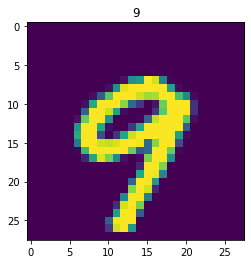

In [15]:
# Now that we have the prediction, we use matplotlib to display the image and its predicted class
img = img.reshape((28,28))
plt.imshow(img)
plt.title(pred_classname)
plt.show()